# Assignment 1: Image Processing

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Import libraries

In [ ]:
# !pip install -q pydicom
import pydicom
from google.colab import files
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from skimage import io, color
from skimage.transform import resize
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import regionprops, label
from skimage.metrics import adapted_rand_error, variation_of_information
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import img_as_ubyte
from google.colab.patches import cv2_imshow

# Pre-process image array

In [ ]:
# array to store lesion images
lesions_ori = {}
lesions = {}
lesions_rgb_ori = {}
lesions_rgb = {}

directory = '/content/gdrive/MyDrive/BMET5933/assignment1/assignment1_train_test_data/assign_train/'

# read all .jpg files (not segmentation masks)
for fname in glob.glob('/content/gdrive/MyDrive/BMET5933/assignment1/assignment1_train_test_data/assign_train/*.jpg', recursive=False):
  # extract the case number from the filename
  filename = os.path.splitext(os.path.basename(fname))[0]
  # open image
  rgb_image = io.imread(fname)
  # save rgb image to a dictionary (key=case number, value=image)
  lesions_rgb_ori[filename] = rgb_image
  # apply segmentation mask
  mask_path = filename + '_Segmentation.png'
  mask_image = io.imread(directory + mask_path)
  masked_image_rgb = cv2.bitwise_and(rgb_image, rgb_image, mask=mask_image)
  # save segmented rgb image to a dictionary (key=case number, value=image)
  lesions_rgb[filename] = masked_image_rgb

  # convert image to grayscale
  gray_image = color.rgb2gray(rgb_image)
  # save grayscale image to a dictionary (key=case number, value=image)
  lesions_ori[filename] = gray_image
  # apply segmentation mask
  masked_image_gray = cv2.bitwise_and(gray_image, gray_image, mask=mask_image)
  # save segmented grayscale image to a dictionary (key=case number, value=image)
  lesions[filename] = masked_image_gray

# sort the dictionary
lesions_rgb_ori = {k: lesions_rgb_ori[k] for k in sorted(lesions_rgb_ori.keys())}
lesions_rgb = {k: lesions_rgb[k] for k in sorted(lesions_rgb.keys())}
lesions_ori = {k: lesions_ori[k] for k in sorted(lesions_ori.keys())}
lesions = {k: lesions[k] for k in sorted(lesions.keys())}

In [ ]:
# print details of first lesion in each dictionary
key, value = list(lesions_rgb_ori.items())[0]
print("Unsegmented RGB image: ", end="")
print(key, value.shape)

key, value = list(lesions_rgb.items())[0]
print("Segmented RGB image: ", end="")
print(key, value.shape)

key, value = list(lesions_ori.items())[0]
print("Unsegmented grayscale image: ", end="")
print(key, value.shape)

key, value = list(lesions.items())[0]
print("Segmented grayscale image: ", end="")
print(key, value.shape)

Unsegmented RGB image: ISIC_0000002 (767, 1022, 3)
Segmented RGB image: ISIC_0000002 (767, 1022, 3)
Unsegmented grayscale image: ISIC_0000002 (767, 1022)
Segmented grayscale image: ISIC_0000002 (767, 1022)


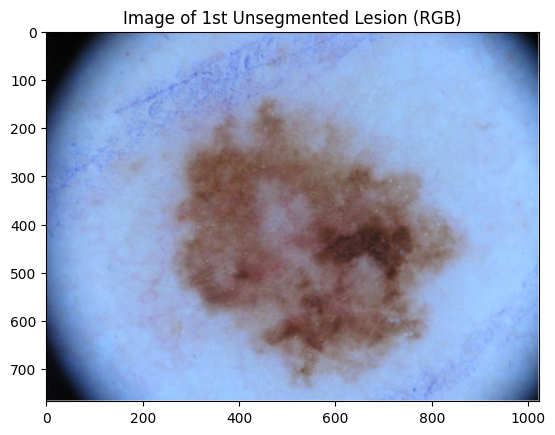

In [ ]:
# display unsegmented lesion image (RGB)
first_lesion = list(lesions_rgb_ori.items())[0]
plt.imshow(first_lesion[1], cmap='gray')
plt.title('Image of 1st Unsegmented Lesion (RGB)')
plt.show()

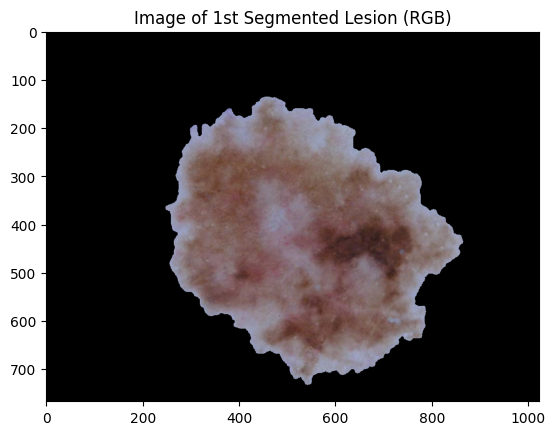

In [ ]:
# display segmented lesion image (RGB)
first_lesion = list(lesions_rgb.items())[0]
plt.imshow(first_lesion[1], cmap='gray')
plt.title('Image of 1st Segmented Lesion (RGB)')
plt.show()

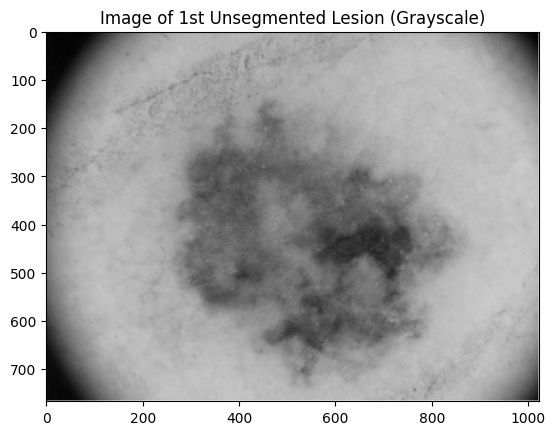

In [ ]:
# display unsegmented lesion image (grayscale)
first_lesion = list(lesions_ori.items())[0]
plt.imshow(first_lesion[1], cmap='gray')
plt.title('Image of 1st Unsegmented Lesion (Grayscale)')
plt.show()

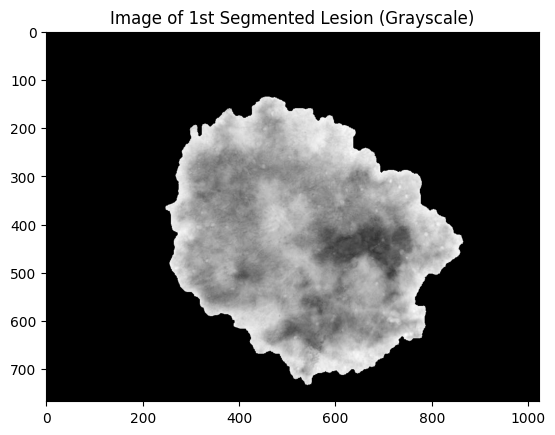

In [ ]:
# display segmented lesion image (grayscale)
first_lesion = list(lesions.items())[0]
plt.imshow(first_lesion[1], cmap='gray')
plt.title('Image of 1st Segmented Lesion (Grayscale)')
plt.show()

In [ ]:
# set new target size for resizing
HEIGHT = 800
WIDTH = 1100
target_size = (HEIGHT, WIDTH)

Note: some code are commented out as running all code wll exceed the provided resources (RAM)

In [ ]:
# resize all images in all dictionaries
'''
# for unsegmented grayscale images
for lesion in list(lesions_ori.items()):
  filename = lesion[0]
  image = lesion[1]
  # Resize the image
  resized_image = resize(image, target_size, anti_aliasing=True)
  lesions_ori[filename] = resized_image

# for segmented grayscale images
for lesion in list(lesions.items()):
  filename = lesion[0]
  image = lesion[1]
  # Resize the image
  resized_image = resize(image, target_size, anti_aliasing=True)
  lesions[filename] = resized_image
'''
# for unsegmented RGB images
for lesion in list(lesions_rgb_ori.items()):
  filename = lesion[0]
  image = lesion[1]
  # Resize the image
  resized_image = resize(image, target_size, anti_aliasing=True)
  lesions_rgb_ori[filename] = resized_image
'''
# for segmented RGB images
for lesion in list(lesions_rgb.items()):
  filename = lesion[0]
  image = lesion[1]
  # Resize the image
  resized_image = resize(image, target_size, anti_aliasing=True)
  lesions_rgb[filename] = resized_image
'''

'\n# for segmented RGB images\nfor lesion in list(lesions_rgb.items()):\n  filename = lesion[0]\n  image = lesion[1]\n  # Resize the image\n  resized_image = resize(image, target_size, anti_aliasing=True)\n  lesions_rgb[filename] = resized_image\n'

In [ ]:
# check new shapes (first lesions in every dictionary)

# for unsegmented grayscale images
# key, value = list(lesions_ori.items())[0]
# print("Unsegmented grayscale image: ", end="")
# print(key, value.shape)

# for segmented grayscale images
# key, value = list(lesions.items())[0]
# print("Segmented grayscale image: ", end="")
# print(key, value.shape)

# for unsegmented RGB images
key, value = list(lesions_rgb_ori.items())[0]
print("Unsegmented RGB image: ", end="")
print(key, value.shape)

# for segmented RGB images
# key, value = list(lesions_rgb.items())[0]
# print("Segmented RGB image: ", end="")
# print(key, value.shape)

Unsegmented RGB image: ISIC_0000002 (800, 1100, 3)


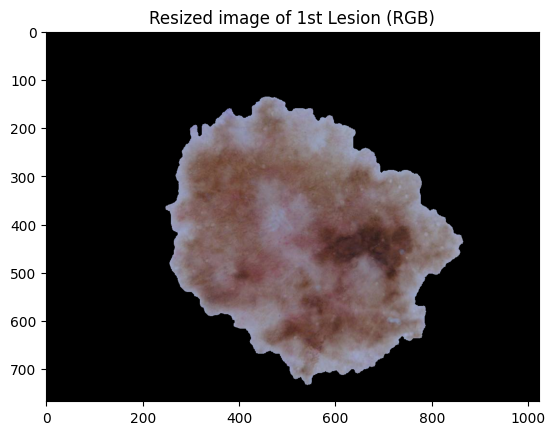

In [ ]:
# display resized first RGB lesion image (unsegmented)
first_lesion = list(lesions_rgb.items())[0]

plt.imshow(first_lesion[1], cmap='gray')
plt.title('Resized image of 1st Lesion (RGB)')
plt.show()

In [ ]:
# read training ground truth file
tgt_path = '/content/gdrive/MyDrive/BMET5933/assignment1/training_data_ground_truth.csv'
training_truth_df  = pd.read_csv(tgt_path)

# convert dataframe to dictionary
training_truth = training_truth_df.set_index('case_number')['disease_status'].to_dict()

# print first 5 key,value pairs of training ground truth data
for key, value in list(training_truth.items())[:5]:
    print(key, value)

NameError: name 'pd' is not defined

# Histograms

Plot averaged histogram to compare red channels for Benign and Malignant lesions

Note: range(1,256) is used to exclude the first bin, which is pixel intensity=0. This is because black takes up most of the segmentation mask, so the frequency of pixel intensity=0 is very high, which causes the other frequency of pixel intensities difficult to observe.

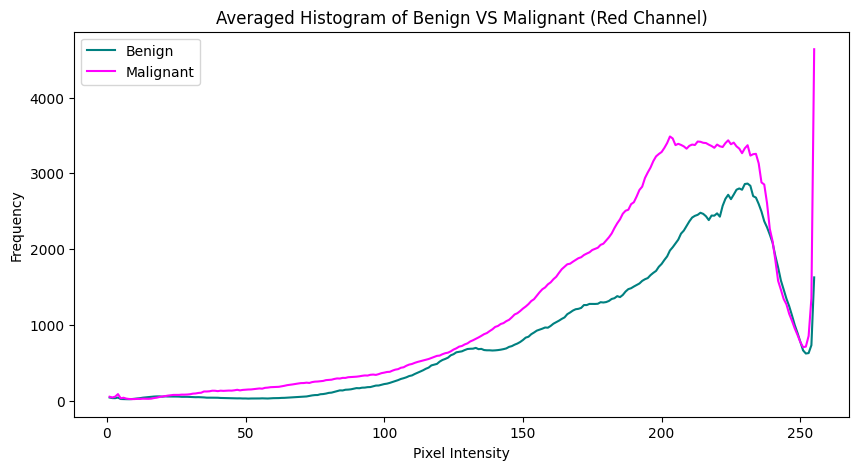

In [ ]:
# empty lists to store histograms
histograms_benign_r = []
histograms_malignant_r = []

# draw histograms for each lesion image
for case_number, disease_status in training_truth.items():
  image = lesions_rgb[case_number]
  red_channel = image[:,:,0]
  hist, bins = np.histogram(red_channel.flatten(), bins=256)
  # sort histograms according to the disease (benign / malignant)
  if disease_status == 'benign':
    histograms_benign_r.append(hist)
  elif disease_status == 'malignant':
    histograms_malignant_r.append(hist)

# convert to numpy arrays for easier manipulation
histograms_benign_r = np.array(histograms_benign_r)
histograms_malignant_r = np.array(histograms_malignant_r)

# calculate average histograms
'''
axis=0: calculate mean vertically
For example, column 1 contains all frequencies for pixel intensity=1,
so we get the mean of all the frequencies for pixel intensity=1
'''
average_histogram_benign_r = np.mean(histograms_benign_r, axis=0)
average_histogram_malignant_r = np.mean(histograms_malignant_r, axis=0)

# Plot both average histograms
plt.figure(figsize=(10, 5)) # initialise chart
plt.plot(range(1,256), average_histogram_benign_r[1:], color='teal', label='Benign')
plt.plot(range(1,256), average_histogram_malignant_r[1:], color='magenta', label='Malignant')
plt.title('Averaged Histogram of Benign VS Malignant (Red Channel)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plot averaged histogram to compare green channels for Benign and Malignant lesions

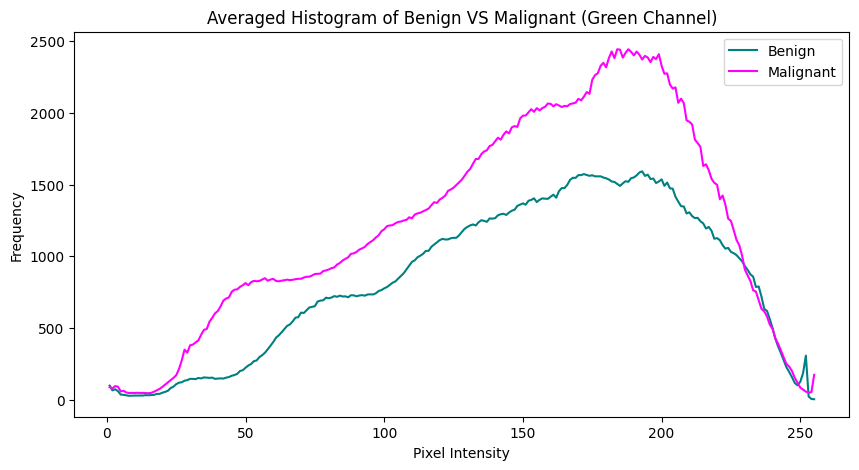

In [ ]:
# empty lists to store histograms
histograms_benign_g = []
histograms_malignant_g = []

# draw histograms for each lesion image
for case_number, disease_status in training_truth.items():
  image = lesions_rgb[case_number]
  green_channel = image[:,:,1]
  hist, bins = np.histogram(green_channel.flatten(), bins=256)
  # sort histograms according to the disease (benign / malignant)
  if disease_status == 'benign':
    histograms_benign_g.append(hist)
  elif disease_status == 'malignant':
    histograms_malignant_g.append(hist)

# convert to numpy arrays for easier manipulation
histograms_benign_g = np.array(histograms_benign_g)
histograms_malignant_g = np.array(histograms_malignant_g)

# calculate average histograms
'''
axis=0: calculate mean vertically
For example, column 1 contains all frequencies for pixel intensity=1,
so we get the mean of all the frequencies for pixel intensity=1
'''
average_histogram_benign_g = np.mean(histograms_benign_g, axis=0)
average_histogram_malignant_g = np.mean(histograms_malignant_g, axis=0)

# Plot both average histograms
plt.figure(figsize=(10, 5)) # initialise chart
plt.plot(range(1,256), average_histogram_benign_g[1:], color='teal', label='Benign')
plt.plot(range(1,256), average_histogram_malignant_g[1:], color='magenta', label='Malignant')
plt.title('Averaged Histogram of Benign VS Malignant (Green Channel)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plot averaged histogram to compare blue channels for Benign and Malignant lesions

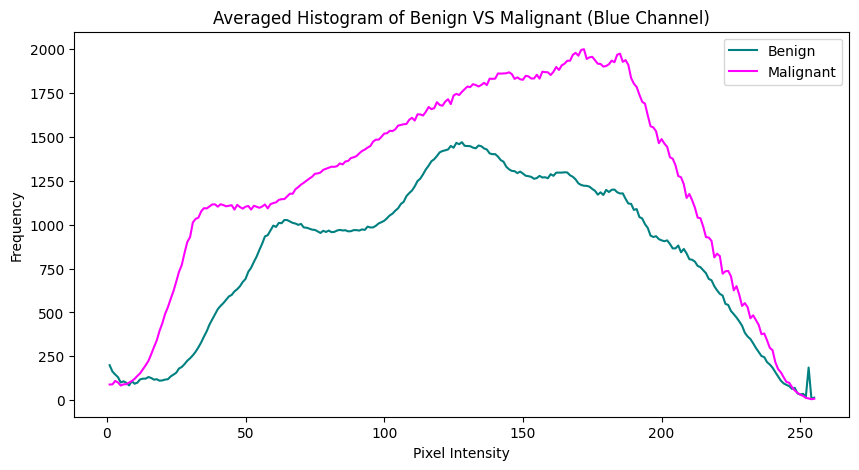

In [ ]:
# empty lists to store histograms
histograms_benign_b = []
histograms_malignant_b = []

# draw histograms for each lesion image
for case_number, disease_status in training_truth.items():
  image = lesions_rgb[case_number]
  blue_channel = image[:,:,2]
  hist, bins = np.histogram(blue_channel.flatten(), bins=256)
  # sort histograms according to the disease (benign / malignant)
  if disease_status == 'benign':
    histograms_benign_b.append(hist)
  elif disease_status == 'malignant':
    histograms_malignant_b.append(hist)

# convert to numpy arrays for easier manipulation
histograms_benign_b = np.array(histograms_benign_b)
histograms_malignant_b = np.array(histograms_malignant_b)

# calculate average histograms
'''
axis=0: calculate mean vertically
For example, column 1 contains all frequencies for pixel intensity=1,
so we get the mean of all the frequencies for pixel intensity=1
'''
average_histogram_benign_b = np.mean(histograms_benign_b, axis=0)
average_histogram_malignant_b = np.mean(histograms_malignant_b, axis=0)

# Plot both average histograms
plt.figure(figsize=(10, 5)) # initialise chart
plt.plot(range(1,256), average_histogram_benign_b[1:], color='teal', label='Benign')
plt.plot(range(1,256), average_histogram_malignant_b[1:], color='magenta', label='Malignant')
plt.title('Averaged Histogram of Benign VS Malignant (Blue Channel)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plot averaged histogram to compare grayscale pixel intensities for Benign and Malignant lesions

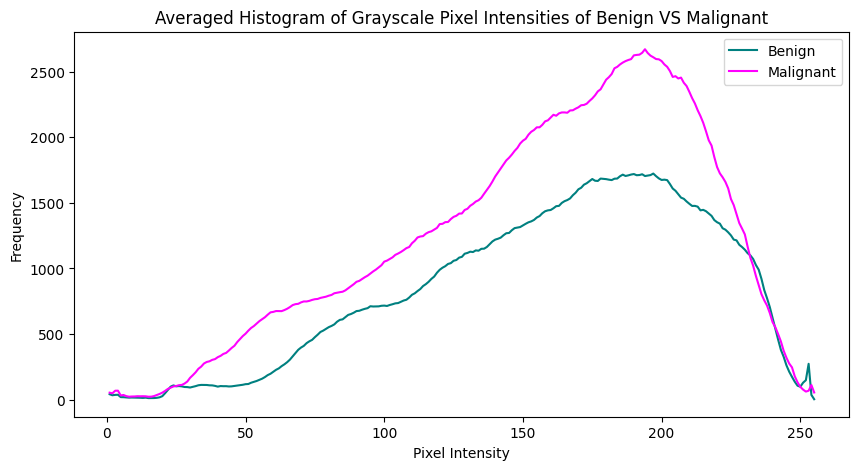

In [ ]:
# empty lists to store histograms
histograms_benign = []
histograms_malignant  = []

# draw histograms for each lesion image
for case_number, disease_status in training_truth.items():
  image = lesions[case_number]
  hist, bins = np.histogram(image.flatten(), bins=256)
  # sort histograms according to the disease (benign / malignant)
  if disease_status == 'benign':
    histograms_benign.append(hist)
  elif disease_status == 'malignant':
    histograms_malignant.append(hist)

# convert to numpy arrays for easier manipulation
histograms_benign = np.array(histograms_benign)
histograms_malignant = np.array(histograms_malignant)

# calculate average histograms
'''
axis=0: calculate mean vertically
For example, column 1 contains all frequencies for pixel intensity=1,
so we get the mean of all the frequencies for pixel intensity=1
'''
average_histogram_benign = np.mean(histograms_benign, axis=0)
average_histogram_malignant = np.mean(histograms_malignant, axis=0)

# Plot both average histograms
plt.figure(figsize=(10, 5)) # initialise chart
plt.plot(range(1,256), average_histogram_benign[1:], color='teal', label='Benign')
plt.plot(range(1,256), average_histogram_malignant[1:], color='magenta', label='Malignant')
plt.title('Averaged Histogram of Grayscale Pixel Intensities of Benign VS Malignant')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Features

Note: features in the feature's dictionary (feature_dict) are energy, contrast, homogeneity, dissimilarity, correlation and angular second moment (ASM) respectively.

In [ ]:
FAC_LEVELS = 16
# compute relationship with pixels from 1 & 2 pixels away from target pixel
DISTANCES = [1, 2]
# compute relationship with pixels from 0,45,90,135 degrees adjacent from target pixel
ANGLES = [0, np.pi/4, np.pi/2, 3*np.pi/4]
GLCM_LEVELS = 256

# empty feature dictionary
feature_dict = {}

# go through each lesion and extract texture features
for case_number, image in lesions.items():

  # calculate factor and create binned image
  les_factor = np.max(image) / (FAC_LEVELS-1)
  les_binned = image // les_factor

  # convert image to integer type
  les_integer = les_binned.astype(int)

  # compute the matrix
  glcmat = graycomatrix(les_integer, distances=DISTANCES, angles=ANGLES, levels=GLCM_LEVELS)

  # find energy value
  glcm_energy = graycoprops(glcmat, 'energy')[0, 0]
  feature_dict[case_number] = [float(glcm_energy)]

  # find contrast value
  glcm_contrast = graycoprops(glcmat, 'contrast')[0, 0]
  feature_dict[case_number].append(float(glcm_contrast))

  # find dissimilarity value
  glcm_dissimilarity = graycoprops(glcmat, 'dissimilarity')[0, 0]
  feature_dict[case_number].append(float(glcm_dissimilarity))

  # find angular second moment value
  glcm_asm = graycoprops(glcmat, 'ASM')[0, 0]
  feature_dict[case_number].append(float(glcm_asm))

In [ ]:
# print out first lesion's GLCM features
list(feature_dict.items())[0]

('ISIC_0000004',
 [0.6658217588359973,
  0.09432211101000908,
  0.05076660600545951,
  0.44331861453946086])

In [ ]:
# empty dictionaries for benign and malignant cases
benign_features = {}
malignant_features = {}

# separate features of Benign and Malignant disease
for case_number, disease_status in training_truth.items():
  if disease_status == 'benign':
    benign_features[case_number] = feature_dict[case_number]
  elif disease_status == 'malignant':
    malignant_features[case_number] = feature_dict[case_number]

In [ ]:
# print first 3 benign lesion's feature values
list(benign_features.items())[:3]

[('ISIC_0000009',
  [0.7732415042108128,
   0.17411737943585076,
   0.05321428571428571,
   0.5979024238342004]),
 ('ISIC_0000016',
  [0.7957522458840771,
   0.15299363057324844,
   0.03992948134667879,
   0.6332216368295528]),
 ('ISIC_0000017',
  [0.8479017897997728,
   0.16108962693357595,
   0.049217470427661544,
   0.7189374451456582])]

In [ ]:
# print first 3 malignant lesion's feature values
list(malignant_features.items())[:3]

[('ISIC_0000002',
  [0.7005476520799206,
   0.21691537761601457,
   0.06371929026387625,
   0.4907670128346896]),
 ('ISIC_0000004',
  [0.6658217588359973,
   0.09432211101000908,
   0.05076660600545951,
   0.44331861453946086]),
 ('ISIC_0000026',
  [0.5103677679364033,
   0.19960873521383085,
   0.05174021838034575,
   0.2604752585483863])]

Calculate mean feature values for Benign cases

In [ ]:
# array to store total feature values
total_b_features = [0,0,0,0]

# go through each feature of each benign lesions and calculate total feature values
for benign_lesion in benign_features.items():
  features = benign_lesion[1]
  for i in range(len(features)):
    total_b_features[i] += features[i]

# array to store mean feature values
mean_b_features = [0,0,0,0]

# calculate mean value for each feature
for i in range(len(total_b_features)):
  mean_b_features[i] = total_b_features[i] / len(benign_features)

print(mean_b_features)

[0.7757721295079405, 0.13420652107976955, 0.04556869881710648, 0.6313528286657573]


Calculate mean feature values for Malignant cases

In [ ]:
# array to store total feature values
total_m_features = [0,0,0,0]

# go through each feature of each benign lesions and calculate total feature values
for malignant_lesion in malignant_features.items():
  features = malignant_lesion[1]
  for i in range(len(features)):
    total_m_features[i] += float(features[i])

# array to store mean feature values
mean_m_features = [0,0,0,0]

# calculate mean value for each feature
for i in range(len(total_m_features)):
  mean_m_features[i] = total_m_features[i] / len(malignant_features)

print(mean_m_features)

[0.6786012913173406, 0.1710245829542008, 0.06593419775553536, 0.48898253150273946]


Display the mean feature values

In [ ]:
# print Benign lesions' mean feature values
print("Benign Lesions Mean Feature Values")
print("Energy: " + str(mean_b_features[0]))
print("Contrast: " + str(mean_b_features[1]))
print("Dissimilarity: " + str(mean_b_features[2]))
print("Angular Second Moment (ASM): " + str(mean_b_features[3]))

# print Malignant lesions' mean feature values
print("\nMalignant Lesions Mean Feature Values")
print("Energy: " + str(mean_m_features[0]))
print("Contrast: " + str(mean_m_features[1]))
print("Dissimilarity: " + str(mean_m_features[2]))
print("Angular Second Moment (ASM): " + str(mean_m_features[3]))

Benign Lesions Mean Feature Values
Energy: 0.7757721295079405
Contrast: 0.13420652107976955
Dissimilarity: 0.04556869881710648
Angular Second Moment (ASM): 0.6313528286657573

Malignant Lesions Mean Feature Values
Energy: 0.6786012913173406
Contrast: 0.1710245829542008
Dissimilarity: 0.06593419775553536
Angular Second Moment (ASM): 0.48898253150273946


# Segmentation

Function for marked watershed algorithm

In [ ]:
# function to perform marked watershed segmentation
def marked_watershed(image):

  # convert image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # find an approximate estimate of the lesion using Otsu's binarization
  ret, thresh = cv2.threshold(gray_image, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # remove noises using morphological opening
  kernel = np.ones((3,3), np.uint8)
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

  # find sure background area
  sure_bg = cv2.dilate(opening, kernel, iterations=3)

  # find sure foreground area
  dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
  ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

  # find unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg, sure_fg)

  # create marker and label the regions inside it
  # label background as 0, label other objects with integers starting from 1
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers + 1
  markers[unknown==255] = 0 #background

  # apply watershed
  markers = cv2.watershed(image, markers)
  image[markers == -1] = [0,255,0]

  # mark boundaries as -1
  image[markers == -1] = [0,255,0]

  return image

In [ ]:
lesions_rgb_ori_uint8 = {}

# pre-processing for AMSMW: rescale lesions' pixels range and convert to uint8
for case_number, image in lesions_rgb_ori.items():
  # Get the minimum and maximum values in the image array
  min_value = np.min(image)
  max_value = np.max(image)

  # Rescale the values to the range 0 to 255
  scaled_image = ((image - min_value) / (max_value - min_value)) * 255

  # Convert the dtype to uint8
  image = scaled_image.astype(np.uint8)
  lesions_rgb_ori_uint8[case_number] = image

In [ ]:
benign_seg = {}
malignant_seg = {}

# sort uint8 datatype lesion images according to disease (benign / malignant)
for case_number, disease_status in training_truth.items():
  image = lesions_rgb_ori_uint8[case_number]
  if disease_status == 'benign':
    benign_seg[case_number] = image
  elif disease_status == 'malignant':
    malignant_seg[case_number] = image

In [ ]:
benign_watershed = {}

# perform marked watershed segmentation on benign lesions
for case_number, image in benign_seg.items():
  segmented_image = marked_watershed(image)
  benign_watershed[case_number] = segmented_image

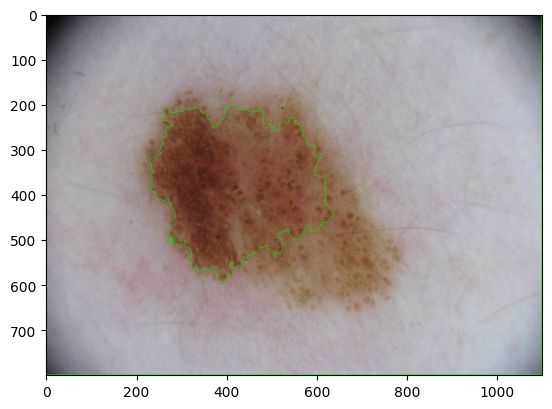

In [ ]:
# display one example of benign's AMSMW segmented lesion
amsmw_b = list(benign_watershed.items())[0][1]
plt.imshow(amsmw_b, cmap='gray')
plt.show()

In [ ]:
malignant_watershed = {}

# perform marked watershed segmentation on malignant lesions
for case_number, image in malignant_seg.items():
  # Perform watershed segmentation
  malignant_watershed[case_number] = marked_watershed(image)

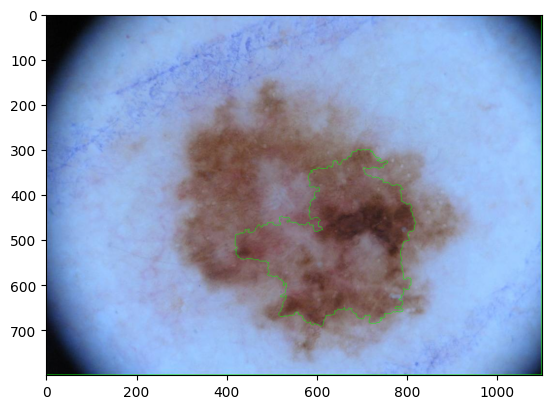

In [ ]:
# display one example of malignant's AMSMW segmented lesion
amsmw_m = list(malignant_watershed.items())[0][1]
plt.imshow(amsmw_m, cmap='gray')
plt.show()

Perform quantitative based assessment of the segmentation method

In [ ]:
ground_truth_masks = {}
benign_truth_masks = {}
malignant_truth_masks = {}

# read all .png files (segmentation masks)
for fname in glob.glob('/content/gdrive/MyDrive/BMET5933/assignment1/assignment1_train_test_data/assign_train/*.png', recursive=False):
  # extract the case number from the filename
  filename = os.path.splitext(os.path.basename(fname))[0]
  filename_parts = filename.split('_')
  filename = '_'.join(filename_parts[:2]) #remove '_Segmentation' from the end of filename

  # open mask image
  mask = io.imread(fname)
  # save ground truth masks to a dictionary (key=case number, value=image)
  ground_truth_masks[filename] = mask

In [ ]:
# resize ground truth masks
for mask in list(ground_truth_masks.items()):
  filename = mask[0]
  image = mask[1]
  # Resize the mask images
  resized_image = resize(image, target_size, anti_aliasing=True)
  ground_truth_masks[filename] = resized_image

In [ ]:
# sort ground truth mask images according to disease (benign / malignant)
for case_number, disease_status in training_truth.items():
  mask = ground_truth_masks[case_number]
  if disease_status == 'benign':
    benign_truth_masks[case_number] = mask
  elif disease_status == 'malignant':
    malignant_truth_masks[case_number] = mask

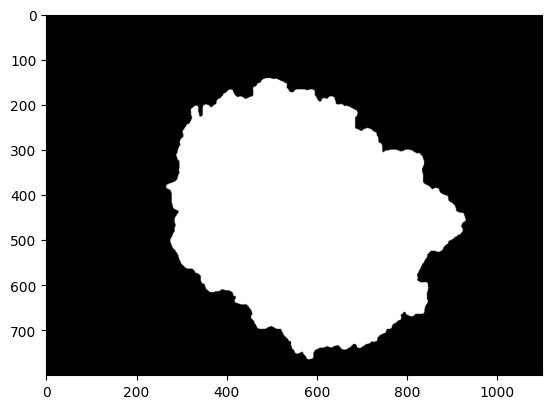

In [ ]:
# display first ground truth mask
first_mask = list(ground_truth_masks.items())[0][1]
plt.imshow(first_mask, cmap='gray')
plt.show()

In [ ]:
# calculate the accuracy of AMSMW segemntation on benign lesions
for case_number, segmented_image in benign_watershed.items():
  # convert segmented image to binary mask
  segmented_binary = segmented_image > 0

  # convert segmented image to grayscale
  segmented_gray = color.rgb2gray(segmented_binary)

  # get corresponding ground truth mask
  ground_truth_mask = benign_truth_masks[case_number]

  # binarize the ground truth mask and the segmented mask
  ground_truth_mask_binary = (ground_truth_mask > 0).astype(int)
  segmented_mask_binary = (segmented_gray > 0).astype(int)

  # compute accuracy
  benign_accuracy = accuracy_score(ground_truth_mask_binary.flatten(), segmented_mask_binary.flatten())

In [ ]:
# calculate the accuracy of AMSMW segemntation on malignant lesions
for case_number, segmented_image in malignant_seg.items():
  # convert segmented image to binary mask
  segmented_binary = segmented_image > 0

  # convert segmented image to grayscale
  segmented_gray = color.rgb2gray(segmented_binary)

  # get corresponding ground truth mask
  ground_truth_mask = malignant_truth_masks[case_number]

  # binarize the ground truth mask and the segmented mask
  ground_truth_mask_binary = (ground_truth_mask > 0).astype(int)
  segmented_mask_binary = (segmented_gray > 0).astype(int)

  # compute accuracy
  malignant_accuracy = accuracy_score(ground_truth_mask_binary.flatten(), segmented_mask_binary.flatten())

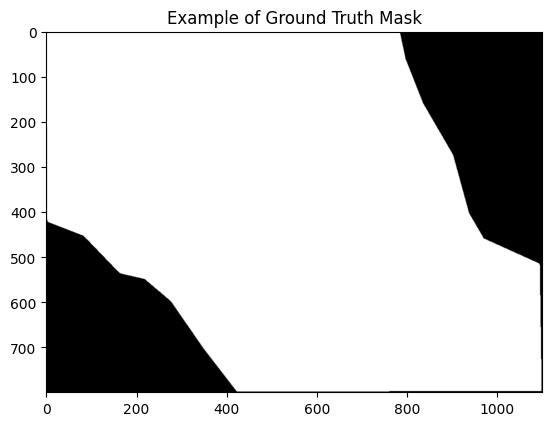

In [ ]:
# display one example of the ground truth mask
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Example of Ground Truth Mask')
plt.show()

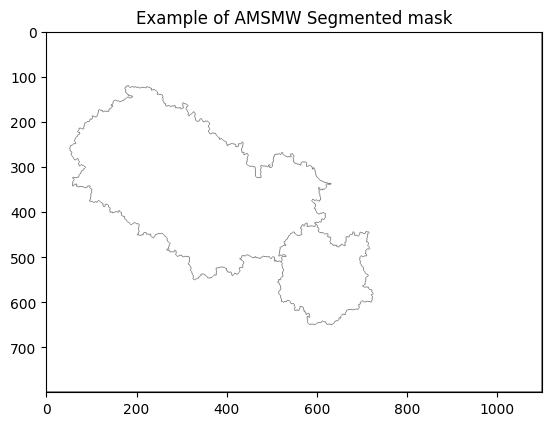

In [ ]:
# display one example of the marked watershed segmented mask
plt.imshow(segmented_gray, cmap='gray')
plt.title('Example of AMSMW Segmented mask')
plt.show()

Print quatitative based assessment results

In [ ]:
print("Quantitative based assessment for  marked watershed algorithm\n")
print("Accuracy for Benign masks: " + str(benign_accuracy))
print("Accuracy for Malignant masks: " + str(malignant_accuracy))

Quantitative based assessment for  marked watershed algorithm

Accuracy for Benign masks: 0.39337045454545455
Accuracy for Malignant masks: 0.7654761363636363


Evaluate segmentation process on test data

In [ ]:
test_rgb = {}

# read all .jpg files (not segmentation masks)
for fname in glob.glob('/content/gdrive/MyDrive/BMET5933/assignment1/assignment1_train_test_data/assign_test/*.jpg', recursive=False):
  # extract the case number from the filename
  filename = os.path.splitext(os.path.basename(fname))[0]
  # open image
  rgb_image = io.imread(fname)
  # save images to a dictionary
  test_rgb[filename] = rgb_image

# sort the dictionary
test_rgb = {k: test_rgb[k] for k in sorted(test_rgb.keys())}

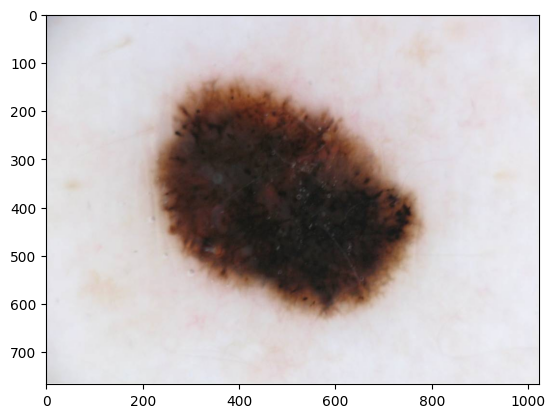

In [ ]:
# display first lesion image
first_lesion = list(test_rgb.items())[0][1]
plt.imshow(first_lesion)
plt.show()

In [ ]:
# resize testing data
for mask in list(test_rgb.items()):
  filename = mask[0]
  image = mask[1]
  # Resize the mask images
  resized_image = resize(image, target_size, anti_aliasing=True)
  test_rgb[filename] = resized_image

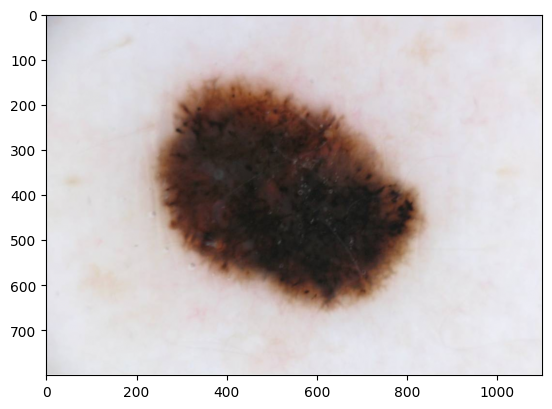

In [ ]:
# display resized first testing data
test = list(test_rgb.items())[0][1]
plt.imshow(test)
plt.show()

In [ ]:
test_masks = {}

# read all segmentation masks
for fname in glob.glob('/content/gdrive/MyDrive/BMET5933/assignment1/assignment1_train_test_data/assign_test/*.png', recursive=False):
  # extract the case number from the filename
  filename = os.path.splitext(os.path.basename(fname))[0]
  filename_parts = filename.split('_')
  filename = '_'.join(filename_parts[:2]) #remove '_Segmentation' from the end of filename

  # open mask image
  mask = io.imread(fname)
  # save images to a dictionary
  test_masks[filename] = mask

# sort the dictionary
test_masks = {k: test_masks[k] for k in sorted(test_rgb.keys())}

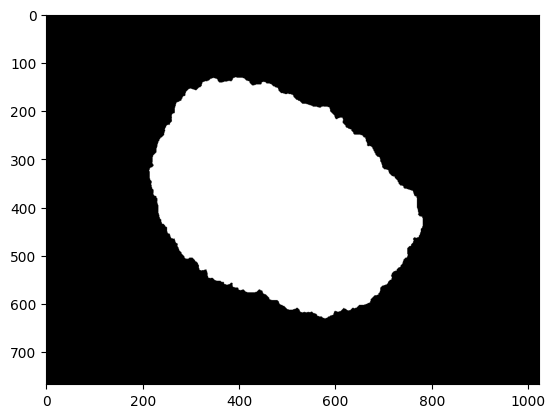

In [ ]:
# display first mask
first_mask = list(test_masks.items())[0][1]
plt.imshow(first_mask, cmap='gray')
plt.show()

In [ ]:
# resize ground truth masks
for mask in list(test_masks.items()):
  filename = mask[0]
  image = mask[1]
  # Resize the mask images
  resized_image = resize(image, target_size, anti_aliasing=True)
  test_masks[filename] = resized_image

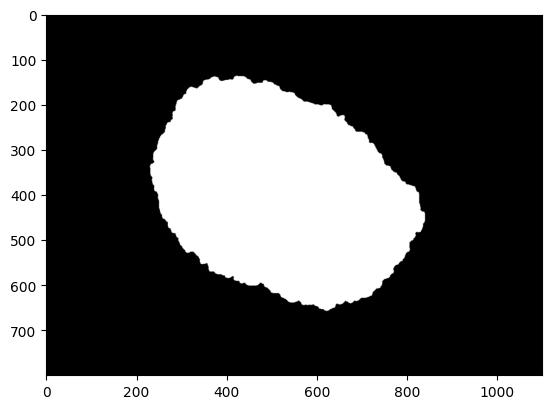

In [ ]:
# display first resized ground truth mask
first_g_mask = list(test_masks.items())[0][1]
plt.imshow(first_g_mask, cmap='gray')
plt.show()

Perform segmentation on testing data

In [ ]:
test_rgb_uint8 = {}

# pre-processing for AMSMW: rescale lesions' pixels range and convert to uint8
for case_number, image in test_rgb.items():
  # Get the minimum and maximum values in the image array
  min_value = np.min(image)
  max_value = np.max(image)

  # Rescale the values to the range 0 to 255
  scaled_image = ((image - min_value) / (max_value - min_value)) * 255

  # Convert the dtype to uint8
  image = scaled_image.astype(np.uint8)
  test_rgb_uint8[case_number] = image

In [ ]:
test_watershed = {}

# perform marked watershed segmentation on benign lesions
for case_number, image in test_rgb_uint8.items():
  segmented_image = marked_watershed(image)
  test_watershed[case_number] = segmented_image

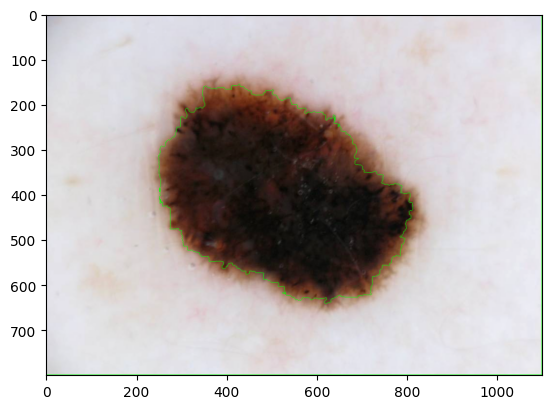

In [ ]:
# display one example of lesion segmented by marked watershed
amsmw_test = list(test_watershed.items())[0][1]
plt.imshow(amsmw_test)
plt.show()

In [ ]:
benign_test = {}
malignant_test = {}

for case_number, segmented_mask in test_watershed.items():
  # convert segmented image to binary mask
  segmented_binary = segmented_mask > 0

  # convert segmented image to grayscale
  segmented_gray = color.rgb2gray(segmented_binary)

  # get corresponding ground truth mask
  ground_truth_mask = test_masks[case_number]

  # binarize the ground truth mask and the segmented mask
  ground_truth_mask_binary = (ground_truth_mask > 0).astype(int)
  segmented_mask_binary = (segmented_gray > 0).astype(int)

  # compute accuracy
  test_accuracy = accuracy_score(ground_truth_mask_binary.flatten(), segmented_mask_binary.flatten())

In [ ]:
print("Accuracy of testing data: " + str(test_accuracy))

0.9956784090909091
